In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('.../train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
test=pd.read_csv('D:/Machine-Learning/Big_Mart-Sales/test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.shape

(5681, 11)

In [7]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
train['Item_Fat_Content']=train['Item_Fat_Content'].str.replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].str.replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].str.replace('reg','Regular')

In [9]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

(array([  53.,   99.,  326.,  429.,  784., 1251., 2051., 2276., 1156.,
          98.]),
 array([3.50525705, 4.10266854, 4.70008003, 5.29749152, 5.89490302,
        6.49231451, 7.089726  , 7.68713749, 8.28454898, 8.88196047,
        9.47937196]),
 <a list of 10 Patch objects>)

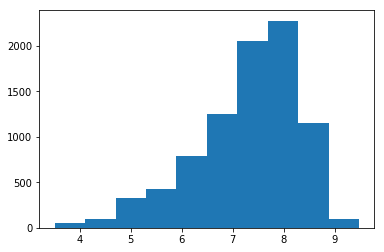

In [15]:
plt.hist(np.log(train.Item_Outlet_Sales))

(array([ 674., 1249., 1639., 1820., 1582.,  950.,  447.,  131.,   27.,
           4.]), array([  5.76974869,  16.6326011 ,  27.4954535 ,  38.3583059 ,
         49.2211583 ,  60.0840107 ,  70.94686311,  81.80971551,
         92.67256791, 103.53542031, 114.39827271]), <a list of 10 Patch objects>)

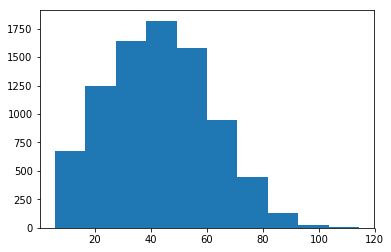

In [16]:
plt.hist(np.sqrt(train.Item_Outlet_Sales))

In [58]:
cat=train.drop(['Item_Identifier'],axis=1).select_dtypes(exclude=np.number)
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [19]:
num=train.drop(['Item_Outlet_Sales'],axis=1).select_dtypes(include=np.number)
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


In [91]:
train['Item_Outlet_Sales'].isnull().sum()

0

In [21]:
cat['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [23]:
cat['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
cat['Outlet_Size'].isnull().sum()/train.shape[0]*100

28.27642848762173

In [32]:
cat['Outlet_Size']=cat['Outlet_Size'].fillna(cat['Outlet_Size'].mode()[0])

C:\Users\VIVEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
cat['Outlet_Size'].isnull().sum()

0

In [34]:
cat['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [36]:
cat['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [38]:
num['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [39]:
cat['Outlet_Establishment_Year']=num['Outlet_Establishment_Year']

C:\Users\VIVEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [41]:
num=num.drop(['Outlet_Establishment_Year'],axis=1)

In [42]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [63]:
num['Item_Weight_sq']=num['Item_Weight']**2
num['Item_Visibility_sq']=num['Item_Visibility']**2
num['Item_MRP_sq']=num['Item_MRP']**2
num['Item_Weight_cu']=num['Item_Weight']**3
num['Item_Visibility_cu']=num['Item_Visibility']**3
num['Item_MRP_cu']=num['Item_MRP']**3
num['Item_Weight_sqrt']=np.sqrt(num['Item_Weight'])
num['Item_Visibility_sqrt']=np.sqrt(num['Item_Visibility'])
num['Item_MRP_sqrt']=np.sqrt(num['Item_MRP'])

In [50]:
num.isnull().sum()

Item_Weight        1463
Item_Visibility       0
Item_MRP              0
dtype: int64

In [52]:
num['Item_Weight']=num['Item_Weight'].fillna(num['Item_Weight'].mean())

## Encoding and Normalising

In [60]:
cat_en=pd.get_dummies(cat,drop_first=True)

In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_sc=pd.DataFrame(ss.fit_transform(num),columns=num.columns)

In [66]:
num_sc.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Weight_sq,Item_Visibility_sq,Item_MRP_sq,Item_Weight_cu,Item_Visibility_cu,Item_MRP_cu,Item_Weight_sqrt,Item_Visibility_sqrt,Item_MRP_sqrt
0,-0.841872,-0.970732,1.747454,-0.863969,-0.631976,2.088766,-0.827605,-0.393685,2.322390,-0.799325,-0.997548,1.538706
1,-1.641706,-0.908111,-1.489023,-1.323655,-0.621334,-1.158031,-1.072524,-0.392459,-0.911199,-1.816287,-0.884139,-1.661959
2,1.098554,-0.956917,0.010040,1.099746,-0.629795,-0.200026,1.041455,-0.393452,-0.341280,1.070860,-0.971612,0.127664
3,1.500838,-1.281758,0.660050,1.657246,-0.655986,0.508135,1.746612,-0.395356,0.326835,1.398276,-2.178206,0.703613
4,-0.929428,-1.281758,-1.399220,-0.924242,-0.655986,-1.127164,-0.865452,-0.395356,-0.902050,-0.900412,-2.178206,-1.520520


In [61]:
cat_en.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [67]:
X=pd.concat([cat_en,num_sc],axis=1)
X.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_MRP,Item_Weight_sq,Item_Visibility_sq,Item_MRP_sq,Item_Weight_cu,Item_Visibility_cu,Item_MRP_cu,Item_Weight_sqrt,Item_Visibility_sqrt,Item_MRP_sqrt
0,0,0,0,0,1,0,0,0,0,0,...,1.747454,-0.863969,-0.631976,2.088766,-0.827605,-0.393685,2.322390,-0.799325,-0.997548,1.538706
1,1,0,0,0,0,0,0,0,0,0,...,-1.489023,-1.323655,-0.621334,-1.158031,-1.072524,-0.392459,-0.911199,-1.816287,-0.884139,-1.661959
2,0,0,0,0,0,0,0,0,0,0,...,0.010040,1.099746,-0.629795,-0.200026,1.041455,-0.393452,-0.341280,1.070860,-0.971612,0.127664
3,1,0,0,0,0,0,1,0,0,0,...,0.660050,1.657246,-0.655986,0.508135,1.746612,-0.395356,0.326835,1.398276,-2.178206,0.703613
4,0,0,0,0,0,0,0,0,0,1,...,-1.399220,-0.924242,-0.655986,-1.127164,-0.865452,-0.395356,-0.902050,-0.900412,-2.178206,-1.520520


In [68]:
Y1=np.log(train.Item_Outlet_Sales)
Y2=np.sqrt(train.Item_Outlet_Sales)

In [69]:
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [70]:
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.model_selection import train_test_split
df_f=pd.DataFrame()
scores=[]
for i in [Y1,Y2]:
    x_train, x_test, y_train, y_test = train_test_split(X,i, test_size=0.2, random_state=42)
    reg=LinearRegression()
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2=r2_score(y_test,y_pred)
    #accuracy= accuracy_score(y_test,y_pred)
    mse= mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    scores.append([r2,mse,rmse])

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X,Y1, test_size=0.2, random_state=42)

In [82]:
scores

[[0.7493227144997999, 0.2645609988786787, 0.5143549347276437],
 [0.6751503947466106, 106.75739667545564, 10.33234710389927]]

In [76]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [84]:
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.6952418568722012
MSE: 0.3216371144334791
RMSE: 0.567130597334934
--------------------------------------------------
R-sq orig price: 0.5178586614298667
MSE orig price: 1310445.7261121406
RMSE orig price: 1144.7470140219368


## Regularisation

In [85]:
from sklearn.linear_model import RidgeCV, Ridge

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.03


In [86]:
ridge = Ridge(alpha=0.03)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.7492735921132818
MSE: 0.2646128418991525
RMSE: 0.5144053284124811
--------------------------------------------------
R-sq orig price: 0.6035362854155111
MSE orig price: 1077576.5087403164
RMSE orig price: 1038.0638269106175


In [88]:
from sklearn.linear_model import LassoCV, Lasso

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.001


In [90]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.7479854253720739
MSE: 0.2659723535082569
RMSE: 0.5157250755085085
--------------------------------------------------
R-sq orig price: 0.6009003250152869
MSE orig price: 1084740.9702049126
RMSE orig price: 1041.508987097525


C:\Users\VIVEK\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.851986238684049, tolerance: 0.7012051806578287
  positive)
